In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
zomato = pd.read_csv('Zomato data .csv')
zomato.shape

(148, 7)

In [3]:
zomato.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
# Rename columns for easier access
zomato.rename(columns={'approx_cost(for two people)': 'cost',
                          'listed_in(type)': 'type',
                          'listed_in(city)': 'city'}, inplace=True)

In [5]:
# checking for null values
zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
cost            0
type            0
dtype: int64

In [6]:
# Checking some values
zomato['rate'].sample(10)

121    3.3/5
9      4.2/5
70     3.6/5
134    3.3/5
71     4.1/5
59     3.7/5
129    3.4/5
95     3.3/5
86     4.4/5
52     4.3/5
Name: rate, dtype: object

In [7]:
# Replace 'NEW' and '-' with NaN
zomato['rate'] = zomato['rate'].replace({'NEW': np.nan, '-': np.nan})

# Drop rows with NaN values
zomato.dropna(how='any', inplace=True)

In [8]:
# checking shape
zomato.shape

(148, 7)

In [9]:
# checking some values of 'cost'
zomato['cost'].sample(10)

145    450
141    350
113    150
121    200
56     300
22     900
144    150
122    100
48     850
139    150
Name: cost, dtype: int64

In [10]:
# Remove '/5' from ratings and convert to float
zomato['rate'] = zomato['rate'].apply(lambda x: str(x).split('/')[0])
zomato['rate'] = zomato['rate'].astype(float)

# Remove commas from cost and convert to float
zomato['cost'] = zomato['cost'].apply(lambda x: str(x).replace(',', ''))
zomato['cost'] = zomato['cost'].astype(float)

In [11]:
# now everything is fine
zomato['cost'].sample(5)

26    200.0
7     600.0
45    400.0
85    300.0
52    400.0
Name: cost, dtype: float64

In [12]:
# checking for duplicated rows

zomato.duplicated().sum()

0

In [13]:
# Drop duplicate rows
zomato.drop_duplicates(inplace=True)

In [14]:
zomato.duplicated().sum()

0

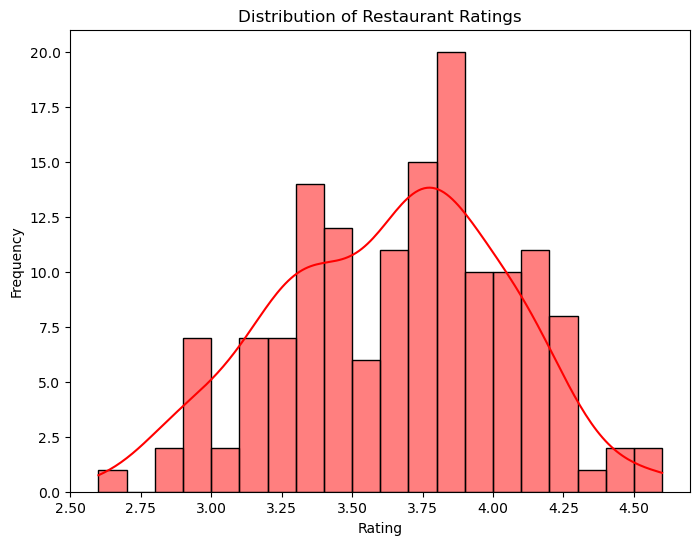

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(zomato['rate'], bins=20, kde=True , color='red')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

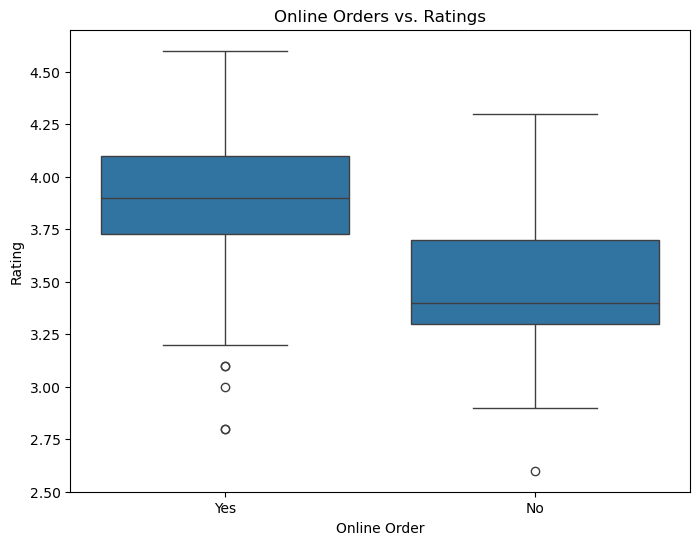

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=zomato)
plt.title('Online Orders vs. Ratings')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()

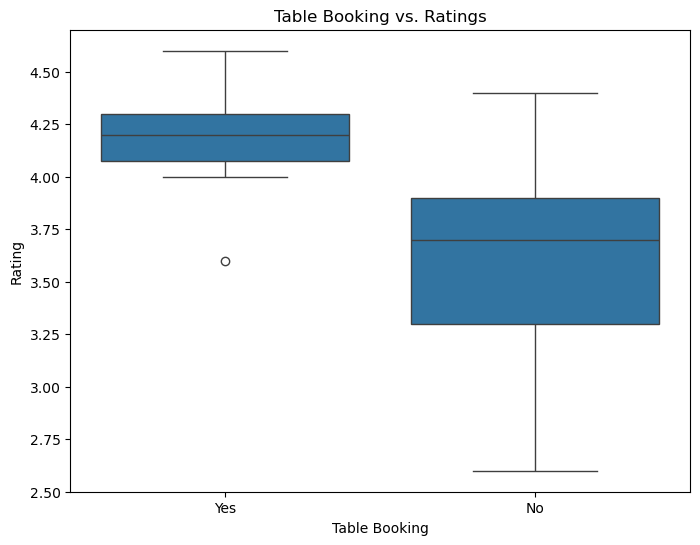

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='book_table', y='rate', data=zomato)
plt.title('Table Booking vs. Ratings')
plt.xlabel('Table Booking')
plt.ylabel('Rating')
plt.show()

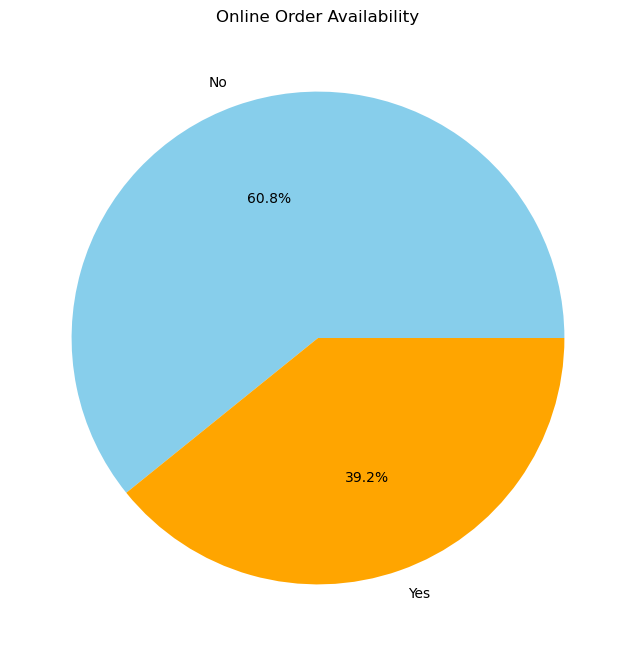

In [18]:
plt.figure(figsize=(8, 8))
zomato['online_order'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Online Order Availability')
plt.ylabel('')
plt.show()

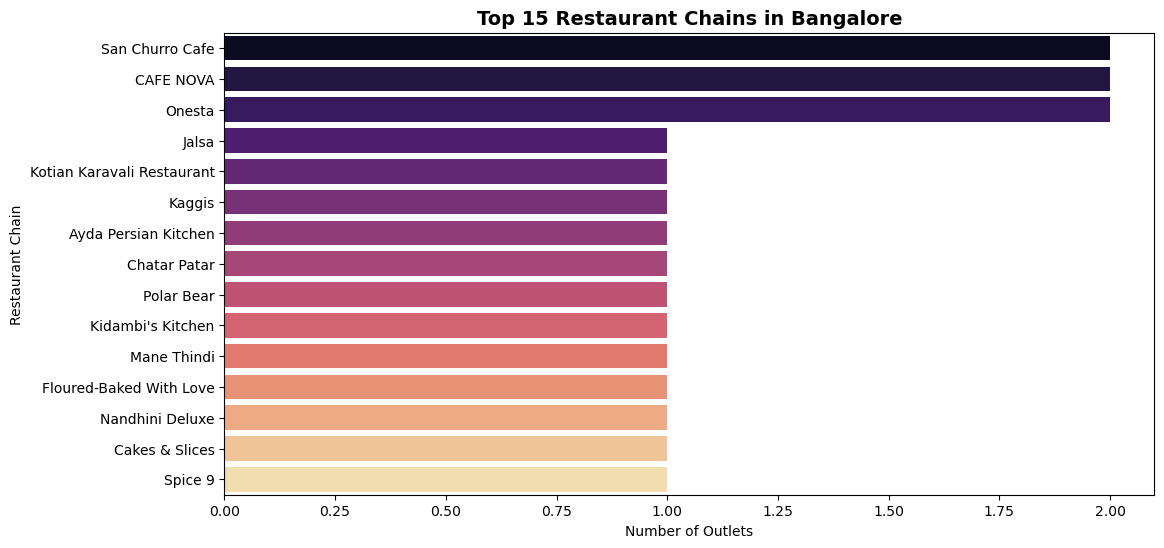

In [19]:
# top 15 restaurant chains with the most outlets
top_chains = zomato['name'].value_counts().nlargest(15)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_chains.index, x=top_chains.values, palette="magma")


plt.title("Top 15 Restaurant Chains in Bangalore", fontsize=14, fontweight="bold")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")

plt.show()